## Load the data

In [1]:

# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf

from keras.utils import image_dataset_from_directory, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense , Flatten, LeakyReLU, BatchNormalization
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.callbacks import EarlyStopping

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


## Load training and validation sets
#ds_train_ = image_dataset_from_directory(
#    'train_data',
#    labels='inferred',
#    label_mode='int',
#    image_size=[128, 128],
#    interpolation='nearest',
#    batch_size=64,
#    shuffle=True,
#)
#ds_test_ = image_dataset_from_directory(
#    'test_data',
#    #labels= 'inferred',
#    #label_mode='int',
#    image_size=[128, 128],
#    interpolation='nearest',
#    batch_size=64,
#    shuffle=False,
#)

test_X = np.zeros((12500,128,128,3))
test_id = []
for i in list(range(1,12501)):
    test_id.append(i)
    path =  f'test_data/{i}.jpg'
    df_test_ = load_img(
        path,
        grayscale=False,
        color_mode='rgb',
        target_size=(128,128),
        interpolation='nearest',
        keep_aspect_ratio=False   
    )
    test_X[i-1,] = img_to_array(df_test_, data_format=None, dtype=None)

ds_train = tf.keras.utils.image_dataset_from_directory(
  'train_data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128,128),
  batch_size=64)

ds_valid = tf.keras.utils.image_dataset_from_directory(
  'train_data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128,128),
  batch_size=64)

#ds_test = tf.keras.utils.image_dataset_from_directory(
#  'test_data',
#  seed=123,
#  image_size=(128,128),
#  batch_size=64)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [2]:
class_names = ds_train.class_names

## Define the model

In [7]:
model = Sequential([
    Convolution2D(32,(3,3), input_shape=(128,128,3), activation='relu'),
    Convolution2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Convolution2D(64,(3,3), activation='relu'),
    Convolution2D(64,(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                  

## Train

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=200,
    callbacks=[early_stopping],verbose=1
)

Epoch 1/200
313/313 [==============================] - 536s 2s/step - loss: 11.1791 - binary_accuracy: 0.5950 - val_loss: 0.6499 - val_binary_accuracy: 0.6296
Epoch 2/200
313/313 [==============================] - 543s 2s/step - loss: 0.6048 - binary_accuracy: 0.6757 - val_loss: 0.6444 - val_binary_accuracy: 0.6336
Epoch 3/200
313/313 [==============================] - 529s 2s/step - loss: 0.5057 - binary_accuracy: 0.7483 - val_loss: 0.7451 - val_binary_accuracy: 0.6322
Epoch 4/200
313/313 [==============================] - 551s 2s/step - loss: 1.4388 - binary_accuracy: 0.5436 - val_loss: 0.6954 - val_binary_accuracy: 0.4880
Epoch 5/200
313/313 [==============================] - 536s 2s/step - loss: 0.6899 - binary_accuracy: 0.5090 - val_loss: 0.6963 - val_binary_accuracy: 0.4848
Epoch 6/200
313/313 [==============================] - 540s 2s/step - loss: 0.6840 - binary_accuracy: 0.5231 - val_loss: 0.7013 - val_binary_accuracy: 0.4880
Epoch 7/200
313/313 [==============================

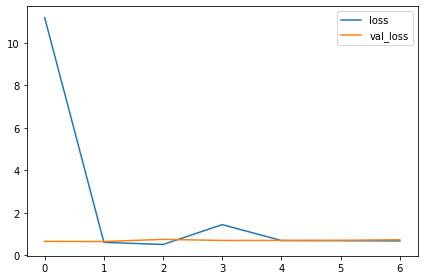

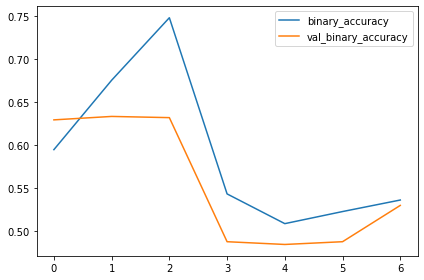

In [9]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [10]:
predictions = model.predict(test_X)



391/391 [==============================] - 43s 104ms/step


In [11]:
predictions.shape

(12500, 1)

In [12]:
output = pd.DataFrame({'id': test_id, 'label': np.round(predictions).flatten()})
output.to_csv('submission_CNN.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
